# Using CNN  on a small MNIST data set

In this script we build a deeper CNN with 4 convolutional layers and 2 dense layers. We use again a small data with only 4000 images in the training data set so that the NN can be trained on the CPU.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Flatten
import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))



Using TensorFlow backend.


Keras 1.2.2 TF 1.0.0 Python sys.version_info(major=3, minor=5, micro=3, releaselevel='final', serial=0)


In [2]:
# To be compatible with python3 and python2
try:
    import cPickle as pickle
except ImportError:
    import pickle
import gzip

with gzip.open('mnist_4000.pkl.gz', 'rb') as f:
    if sys.version_info.major > 2:
        (X,y) = pickle.load(f, encoding='latin1')
    else:
        (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])

print(X.shape, y.shape, PIXELS) #As read
# We need to reshape for the MLP
X = X.reshape([4000, 784])
np.shape(X)

(4000, 28, 28, 1)
(1000, 28, 28, 1)


In [ ]:
X_train=X[0:2400]
Y_train=y[0:2400]
X_val=X[2400:3000]
Y_val=y[2400:3000]


In [ ]:
X_train=np.reshape(X_train, (2400,28,28,1))
X_val=np.reshape(X_val, (600,28,28,1))
print(X_train.shape)
print(X_val.shape)

In [ ]:
plt.imshow(X_train[2,:,:,0],cmap="gray")

In [4]:
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='float32')
    result[np.arange(len(vector)), vector] = 1
    return result
print("class label")
print(Y_train[0:5])
print("class label in OneHot encodig")
print(convertToOneHot(Y_train[0:5], 10))

class label
[5 0 4 1 9]
class label in OneHot encodig
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [5]:
Y_train=convertToOneHot(Y_train,num_classes=10)
print(Y_train.shape)
Y_val=convertToOneHot(Y_val,num_classes=10)
print(Y_val.shape)

(4000, 10)
(1000, 10)


In [6]:
# here we center and standardize the data
X_mean = np.mean( X_train, axis = 0)
X_std = np.std( X_train, axis = 0)

X_train = (X_train - X_mean ) / (X_std + 0.0001)
X_val = (X_val - X_mean ) / (X_std + 0.0001)

In [7]:
# here we define some important hyperparameter of the NN
batch_size = 128
nb_classes = 10
nb_epoch = 6
img_rows, img_cols = 28, 28
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 1)
pool_size = (2, 2)

In [8]:
### a deeper CNN model
name = 'cnn2'
model = Sequential()
name = 'cnn'

model.add(Convolution2D(32, kernel_size[0], kernel_size[1],init='he_normal',
                        border_mode='same',
                        input_shape=input_shape))
model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(32, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(64, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

# here is your code comming:


# end of your code

model.add(Flatten())#macht einen vektor aus dem output
model.add(Dense(200,init='he_normal'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(nb_classes,init='he_normal'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [9]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 28, 28, 32)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 28, 28, 32)    128         convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 28, 28, 32)    0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 28, 28, 32)    9248        activation_1[0][0]               
___________________________________________________________________________________________

In [10]:
tensorboard = keras.callbacks.TensorBoard(
        log_dir='tensorboard/mnist/' + name + '/', 
        write_graph=True,
        histogram_freq=1)

In [11]:
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  nb_epoch=8,
                  verbose=1, 
                  validation_data=(X_val, Y_val),
                  callbacks=[tensorboard])

Train on 4000 samples, validate on 1000 samples
INFO:tensorflow:Summary name convolution2d_1_W:0 is illegal; using convolution2d_1_W_0 instead.
INFO:tensorflow:Summary name convolution2d_1_b:0 is illegal; using convolution2d_1_b_0 instead.
INFO:tensorflow:Summary name batchnormalization_1_gamma:0 is illegal; using batchnormalization_1_gamma_0 instead.
INFO:tensorflow:Summary name batchnormalization_1_beta:0 is illegal; using batchnormalization_1_beta_0 instead.
INFO:tensorflow:Summary name batchnormalization_1_running_mean:0 is illegal; using batchnormalization_1_running_mean_0 instead.
INFO:tensorflow:Summary name batchnormalization_1_running_std:0 is illegal; using batchnormalization_1_running_std_0 instead.
INFO:tensorflow:Summary name convolution2d_2_W:0 is illegal; using convolution2d_2_W_0 instead.
INFO:tensorflow:Summary name convolution2d_2_b:0 is illegal; using convolution2d_2_b_0 instead.
INFO:tensorflow:Summary name batchnormalization_2_gamma:0 is illegal; using batchnormali

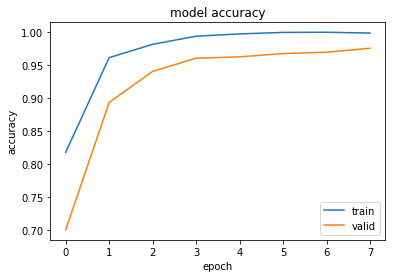

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()

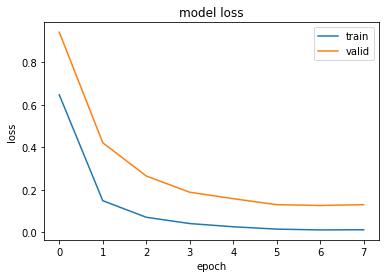

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
#!tensorboard --logdir=tensorboard/tensorboard/mnist/